<a href="https://colab.research.google.com/github/stonerrb/MisaHub/blob/main/MisaHubResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying Bleeding and Non-Bleeding Using Resnet**

# **Importing and Splitting**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
zip_path = '/content/drive/MyDrive/WCEBleedGen.zip'
!unzip $zip_path -d MISAHUB

In [ ]:
import os
import shutil

images_folder = '/content/MISAHUB/WCEBleedGen/bleeding/Images'
annotations_folder = '/content/MISAHUB/WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT'
output_folder = '/content/MISAHUB/train/'

# Create the 'train' folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create 'images' and 'labels' folders inside 'train'
images_output_folder = os.path.join(output_folder, 'images')
labels_output_folder = os.path.join(output_folder, 'labels')

os.makedirs(images_output_folder, exist_ok=True)
os.makedirs(labels_output_folder, exist_ok=True)

# Get a list of files in both folders
image_files = os.listdir(images_folder)
annotation_files = os.listdir(annotations_folder)

# Ensure only files with the same base name are considered
image_files = [file for file in image_files if file.endswith('.png')]
annotation_files = [file for file in annotation_files if file.endswith('.txt')]

# Sort the files to ensure consistent numbering
image_files.sort()
annotation_files.sort()

# Rename and move the files to the 'train' folder
for i, (image_file, annotation_file) in enumerate(zip(image_files, annotation_files), start=1):
    # Define the new names for the image and annotation
    new_image_name = f"image_{i}.png"
    new_annotation_name = f"image_{i}.txt"

    # Rename and move the image file
    old_image_path = os.path.join(images_folder, image_file)
    new_image_path = os.path.join(images_output_folder, new_image_name)
    os.rename(old_image_path, new_image_path)

    # Rename and move the annotation file
    old_annotation_path = os.path.join(annotations_folder, annotation_file)
    new_annotation_path = os.path.join(labels_output_folder, new_annotation_name)
    os.rename(old_annotation_path, new_annotation_path)

    print(f"Renamed and moved: {image_file} to {new_image_name}")
    print(f"Renamed and moved: {annotation_file} to {new_annotation_name}")

print("All files have been renamed and moved to the 'train' folder.")


In [ ]:
import os
import shutil

images_folder = '/content/MISAHUB/WCEBleedGen/non-bleeding/images'
output_folder = '/content/MISAHUB/train/'

# Create the 'train' folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create 'images' and 'labels' folders inside 'train'
images_output_folder = os.path.join(output_folder, 'images')
labels_output_folder = os.path.join(output_folder, 'labels')

os.makedirs(images_output_folder, exist_ok=True)
os.makedirs(labels_output_folder, exist_ok=True)

# Get a list of files in the 'images' folder
image_files = os.listdir(images_folder)
image_files = [file for file in image_files if file.endswith('.png')]
image_files.sort()

# Rename and move the files to the 'train' folder
for i, image_file in enumerate(image_files, start=1310):
    # Define the new names for the image and annotation
    new_image_name = f"images_{i}.png"
    new_annotation_name = f"images_{i}.txt"

    # Rename and move the image file
    old_image_path = os.path.join(images_folder, image_file)
    new_image_path = os.path.join(images_output_folder, new_image_name)
    os.rename(old_image_path, new_image_path)

    # Create an empty label file in the 'labels' folder
    new_annotation_path = os.path.join(labels_output_folder, new_annotation_name)
    with open(new_annotation_path, 'w') as empty_file:
        pass

    print(f"Renamed and moved: {image_file} to {new_image_name}")
    print(f"Created empty label file: {new_annotation_name}")

print("All files have been renamed and moved to the 'train' folder.")

In [ ]:
! ls MISAHUB/newTrain/bleeding | wc -l

In [ ]:
import os
import shutil

# Define the paths to the 'train' directory and its subdirectories
train_dir = 'MISAHUB/train'  # Update this with the actual path to your 'train' directory
images_dir = os.path.join(train_dir, 'images')
labels_dir = os.path.join(train_dir, 'labels')
train_dir = 'MISAHUB/newTrain'
# Create output directories for the two classes
bleeding_dir = os.path.join(train_dir, 'bleeding')
non_bleeding_dir = os.path.join(train_dir, 'non_bleeding')

# Create the 'bleeding' and 'non_bleeding' directories if they don't exist
os.makedirs(bleeding_dir, exist_ok=True)
os.makedirs(non_bleeding_dir, exist_ok=True)

# Iterate through the files in the 'images' directory
for image_filename in os.listdir(images_dir):
    # Form the corresponding label file path
    label_filename = os.path.splitext(image_filename)[0] + '.txt'
    label_filepath = os.path.join(labels_dir, label_filename)

    # Check if the label file is empty (indicating non-bleeding)
    if os.path.exists(label_filepath) and os.path.getsize(label_filepath) == 0:
        # Move the image to the 'non_bleeding' directory
        shutil.move(os.path.join(images_dir, image_filename), os.path.join(non_bleeding_dir, image_filename))
    else:
        # Move the image to the 'bleeding' directory
        shutil.move(os.path.join(images_dir, image_filename), os.path.join(bleeding_dir, image_filename))

print("Dataset organized into 'bleeding' and 'non_bleeding' classes.")


In [ ]:
import os
import random
import shutil

# Define the paths to the 'bleeding' and 'non_bleeding' directories
bleeding_dir = '/content/MISAHUB/newTrain/bleeding'  # Update with the actual path to your 'bleeding' directory
non_bleeding_dir = '/content/MISAHUB/newTrain/non_bleeding'  # Update with the actual path to your 'non-bleeding' directory

# Define the path to the 'test' directory
test_dir = '/content/MISAHUB/test'  # Update with the path where you want to create the 'test' directory

# Create the 'test' directory if it doesn't exist
os.makedirs(test_dir, exist_ok=True)

# Define the number of files to randomly select from each directory
num_files_to_select = 20

# Randomly select 20 files from the 'bleeding' directory
bleeding_files = os.listdir(bleeding_dir)
selected_bleeding_files = random.sample(bleeding_files, num_files_to_select)

# Randomly select 20 files from the 'non_bleeding' directory
non_bleeding_files = os.listdir(non_bleeding_dir)
selected_non_bleeding_files = random.sample(non_bleeding_files, num_files_to_select)

# Copy the selected 'bleeding' files to the 'test' directory with new names
for filename in selected_bleeding_files:
    source_filepath = os.path.join(bleeding_dir, filename)
    new_filename = f'bleeding_{filename}'
    dest_filepath = os.path.join(test_dir, new_filename)
    shutil.copy(source_filepath, dest_filepath)
    # Remove the file from the 'bleeding' directory
    os.remove(source_filepath)

# Copy the selected 'non_bleeding' files to the 'test' directory with new names
for filename in selected_non_bleeding_files:
    source_filepath = os.path.join(non_bleeding_dir, filename)
    new_filename = f'non_bleeding_{filename}'
    dest_filepath = os.path.join(test_dir, new_filename)
    shutil.copy(source_filepath, dest_filepath)
    # Remove the file from the 'non_bleeding' directory
    os.remove(source_filepath)

print(f"Selected and copied {num_files_to_select} files from 'bleeding' and 'non-bleeding' to the 'test' directory, and removed them from the original directories.")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from pathlib import Path
dataset_dir = 'MISAHUB/newTrain'
dataset_dir = Path(dataset_dir)
bleeding = list(dataset_dir.glob('bleeding/*'))
print(bleeding[0])
image = PIL.Image.open(str(bleeding[0]))
width, height = image.size
print(width, height)

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the path to the 'train' directory
train_dir = 'MISAHUB/newTrain'
img_height,img_width=224,224
batch_size=32
train_dataset = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,  # Adjust batch size as needed
    image_size=(224, 224),  # Specify the desired image size
    shuffle=True,
    seed=123,
    validation_split=0.2,  # Split a portion of data for validation
    subset='training'  # Use 'training' subset for training data
)

# Create the validation dataset with the same validation split
validation_dataset = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,  # Adjust batch size as needed
    image_size=(224, 224),  # Specify the desired image size
    shuffle=True,
    seed=123,
    validation_split=0.2,  # Use the same validation split as for training
    subset='validation'  # Use 'validation' subset for validation data
)

In [ ]:
class_names = train_dataset.class_names
print(class_names)

# **Classification ResNet**

In [ ]:
from tensorflow.keras.regularizers import l2
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=2,
                   weights='imagenet')
# for layer in pretrained_model.layers:
#         layer.trainable=False
# Unfreeze specific layers
for layer in pretrained_model.layers:
    if layer.name in ['block4_conv1', 'block4_conv2', 'block4_conv3']:
        layer.trainable = True
    else:
        layer.trainable = False

# Compile the model after unfreezing layers
# resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.02)))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.02)))

In [ ]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_9 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_10 (ModuleW  (None, 512)               1049088   
 rapper)                                                         
                                                                 
 module_wrapper_11 (ModuleW  (None, 512)               0         
 rapper)                                                         
                                                                 
 module_wrapper_12 (ModuleW  (None, 1)                 513       
 rapper)                                              

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=5
history = resnet_model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/5
65/65 [==============================] - 14s 152ms/step - loss: 3.4739 - accuracy: 0.7551 - val_loss: 0.1862 - val_accuracy: 0.9204
Epoch 2/5
65/65 [==============================] - 9s 138ms/step - loss: 0.1884 - accuracy: 0.9180 - val_loss: 0.1198 - val_accuracy: 0.9515
Epoch 3/5
65/65 [==============================] - 9s 130ms/step - loss: 0.1345 - accuracy: 0.9467 - val_loss: 0.0959 - val_accuracy: 0.9689
Epoch 4/5
65/65 [==============================] - 9s 133ms/step - loss: 0.0903 - accuracy: 0.9656 - val_loss: 0.0777 - val_accuracy: 0.9689
Epoch 5/5
65/65 [==============================] - 9s 138ms/step - loss: 0.0717 - accuracy: 0.9762 - val_loss: 0.1072 - val_accuracy: 0.9534


In [ ]:
import os

# Define the path to the 'test' directory
test_dir = 'MISAHUB/test'  # Update with the actual path to your 'test' directory

# Get a list of all image files in the 'test' directory
test_image_files = [os.path.join(test_dir, filename) for filename in os.listdir(test_dir)]

# Iterate through the 'test' images
for image_file in test_image_files:
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_file, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.expand_dims(img, axis=0)

    # Make predictions using the model
    predictions = resnet_model.predict(img)

    # Get the class label (assuming binary classification with 0 and 1)
    class_label = "bleeding" if predictions[0][0] > 0.5 else "non-bleeding"

    # Print the file name and predicted class
    print(f"File: {os.path.basename(image_file)}, Predicted Class: {class_label}")


# VGG

In [ ]:
vgg = Sequential()

pretrained = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    # input_tensor=None,
    input_shape=(224,224,3),
    pooling='max',
    classes=2,
    classifier_activation='softmax'
)

# **Evaluating Model**

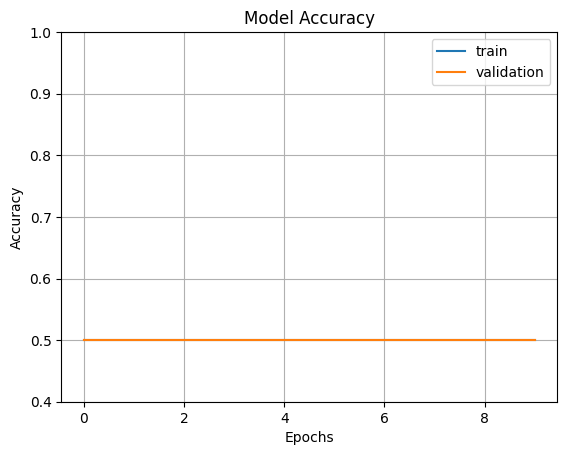

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# **Making Prediction**

In [ ]:
import cv2

dataset_dir = Path(dataset_dir)
nonbleeding = list(dataset_dir.glob('non-bleeding/*'))
for x in range(50):
  image=cv2.imread(str(nonbleeding[x]))
  image_resized= cv2.resize(image, (img_height,img_width))
  image=np.expand_dims(image_resized,axis=0)
  pred=resnet_model.predict(image)
  print(pred)
# print(image.shape)


1/1 [==============================] - 0s 25ms/step
[[0.]]
1/1 [==============================] - 0s 23ms/step
[[0.]]
1/1 [==============================] - 0s 26ms/step
[[0.]]
1/1 [==============================] - 0s 23ms/step
[[0.]]
1/1 [==============================] - 0s 27ms/step
[[0.]]
1/1 [==============================] - 0s 25ms/step
[[0.]]
1/1 [==============================] - 0s 25ms/step
[[0.]]
1/1 [==============================] - 0s 26ms/step
[[0.]]
1/1 [==============================] - 0s 24ms/step
[[0.]]
1/1 [==============================] - 0s 37ms/step
[[0.]]
1/1 [==============================] - 0s 23ms/step
[[0.]]
1/1 [==============================] - 0s 27ms/step
[[0.]]
1/1 [==============================] - 0s 24ms/step
[[0.]]
1/1 [==============================] - 0s 23ms/step
[[0.]]
1/1 [==============================] - 0s 26ms/step
[[0.]]
1/1 [==============================] - 0s 26ms/step
[[0.]]
1/1 [==============================] - 0s 26ms/step
[[0.

In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[0.]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is bleeding


# **Playground**

In [ ]:
import os
import xml.etree.ElementTree as ET

# Directory containing XML files
xml_folder = "/content/MISAHUB/WCEBleedGen/bleeding/Bounding boxes/XML"

# Directory to save TXT files
txt_folder = "/content/MISAHUB/WCEBleedGen/bleeding/Bounding boxes/TXT"

# Create the TXT folder if it doesn't exist
os.makedirs(txt_folder, exist_ok=True)

# Iterate through XML files in the folder
for xml_filename in os.listdir(xml_folder):
    if xml_filename.endswith(".xml"):
        # Construct the full paths for XML and TXT files
        xml_path = os.path.join(xml_folder, xml_filename)
        txt_filename = os.path.splitext(xml_filename)[0] + ".txt"
        txt_path = os.path.join(txt_folder, txt_filename)

        # Parse the XML file
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Open the TXT file for writing
        with open(txt_path, "w") as txt_file:
            # Loop through object elements in the XML
            for obj in root.findall('object'):
                # Extract bounding box coordinates
                xmin = int(obj.find('bndbox/xmin').text)
                ymin = int(obj.find('bndbox/ymin').text)
                xmax = int(obj.find('bndbox/xmax').text)
                ymax = int(obj.find('bndbox/ymax').text)

                # Write the coordinates to the TXT file
                txt_file.write(f"{xmin} {ymin} {xmax} {ymax}\n")

        print(f"Converted {xml_filename} to {txt_filename}")

print("Conversion complete.")


In [ ]:
import os
import shutil

images_folder = '/content/MISAHUB/WCEBleedGen/bleeding/Images'
annotations_folder = '/content/MISAHUB/WCEBleedGen/bleeding/Bounding boxes/TXT'
output_folder = '/content/MISAHUB/train/'


# Create the 'train' folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create 'images' and 'labels' folders inside 'train'
images_output_folder = os.path.join(output_folder, 'images')
labels_output_folder = os.path.join(output_folder, 'labels')

os.makedirs(images_output_folder, exist_ok=True)
os.makedirs(labels_output_folder, exist_ok=True)

# Get a list of files in both folders
image_files = os.listdir(images_folder)
annotation_files = os.listdir(annotations_folder)

# Ensure only files with the same base name are considered
image_files = [file for file in image_files if file.endswith('.png')]
annotation_files = [file for file in annotation_files if file.endswith('.txt')]

# Sort the files to ensure consistent numbering
image_files.sort()
annotation_files.sort()

# Rename and move the files to the 'train' folder
for i, (image_file, annotation_file) in enumerate(zip(image_files, annotation_files), start=1):
    # Define the new names for the image and annotation
    new_image_name = f"image_{i}.png"
    new_annotation_name = f"image_{i}.txt"

    # Rename and move the image file
    old_image_path = os.path.join(images_folder, image_file)
    new_image_path = os.path.join(images_output_folder, new_image_name)
    os.rename(old_image_path, new_image_path)

    # Rename and move the annotation file
    old_annotation_path = os.path.join(annotations_folder, annotation_file)
    new_annotation_path = os.path.join(labels_output_folder, new_annotation_name)
    os.rename(old_annotation_path, new_annotation_path)

    print(f"Renamed and moved: {image_file} to {new_image_name}")
    print(f"Renamed and moved: {annotation_file} to {new_annotation_name}")

print("All files have been renamed and moved to the 'train' folder.")


In [ ]:
import os
import shutil

images_folder = '/content/MISAHUB/WCEBleedGen/non-bleeding/images'
output_folder = '/content/MISAHUB/train/'

# Create the 'train' folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create 'images' and 'labels' folders inside 'train'
images_output_folder = os.path.join(output_folder, 'images')
labels_output_folder = os.path.join(output_folder, 'labels')

os.makedirs(images_output_folder, exist_ok=True)
os.makedirs(labels_output_folder, exist_ok=True)

# Get a list of files in the 'images' folder
image_files = os.listdir(images_folder)
image_files = [file for file in image_files if file.endswith('.png')]
image_files.sort()

# Rename and move the files to the 'train' folder
for i, image_file in enumerate(image_files, start=1310):
    # Define the new names for the image and annotation
    new_image_name = f"images_{i}.png"
    new_annotation_name = f"images_{i}.txt"

    # Rename and move the image file
    old_image_path = os.path.join(images_folder, image_file)
    new_image_path = os.path.join(images_output_folder, new_image_name)
    os.rename(old_image_path, new_image_path)

    # Create an empty label file in the 'labels' folder
    new_annotation_path = os.path.join(labels_output_folder, new_annotation_name)
    with open(new_annotation_path, 'w') as empty_file:
        pass

    print(f"Renamed and moved: {image_file} to {new_image_name}")
    print(f"Created empty label file: {new_annotation_name}")

print("All files have been renamed and moved to the 'train' folder.")


In [ ]:
!rm -r train_f
!rm -r test_f
!rm -r val_f
import os
import shutil
import random

# Define the paths to the source images and labels directories
source_images_dir = '/content/MISAHUB/train/images'
source_labels_dir = '/content/MISAHUB/train/labels'

train_ratio = 0.6
test_ratio = 0.15
val_ratio=0.25


# Define the paths for the train, validation, and test directories
train_dir = 'train_f'
val_dir = 'val_f'
test_dir = 'test_f'

# Define subdirectories for images and labels within train, val, and test
subdirectories = ['images', 'labels']

# Create the target directories and subdirectories if they don't exist
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)
    for subdirectory in subdirectories:
        os.makedirs(os.path.join(directory, subdirectory), exist_ok=True)

# List all image files in the source directory
image_files = [file for file in os.listdir(source_images_dir) if file.endswith('.png')]

# Shuffle the list of image files
random.shuffle(image_files)

# Calculate the number of files for each split
total_files = len(image_files)
num_train = int(total_files * train_ratio)
num_val = int(total_files * val_ratio)

# Split the image files into train, validation, and test sets
train_files = image_files[:num_train]
val_files = image_files[num_train:num_train + num_val]
test_files = image_files[num_train + num_val:]

# Copy the corresponding label files to the respective directories
for file in train_files:
    base_name = os.path.splitext(file)[0]
    label_file = f"{base_name}.txt"
    shutil.copy(os.path.join(source_labels_dir, label_file), os.path.join(train_dir, 'labels', label_file))

for file in val_files:
    base_name = os.path.splitext(file)[0]
    label_file = f"{base_name}.txt"
    shutil.copy(os.path.join(source_labels_dir, label_file), os.path.join(val_dir, 'labels', label_file))

for file in test_files:
    base_name = os.path.splitext(file)[0]
    label_file = f"{base_name}.txt"
    shutil.copy(os.path.join(source_labels_dir, label_file), os.path.join(test_dir, 'labels', label_file))

# Copy the image files to their respective directories
for file in train_files:
    shutil.copy(os.path.join(source_images_dir, file), os.path.join(train_dir, 'images', file))

for file in val_files:
    shutil.copy(os.path.join(source_images_dir, file), os.path.join(val_dir, 'images', file))

for file in test_files:
    shutil.copy(os.path.join(source_images_dir, file), os.path.join(test_dir, 'images', file))

print("Splitting complete.")


In [ ]:
from torchvision import models
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform

        # List all image and label file names
        self.image_files = os.listdir(self.image_dir)
        self.label_files = os.listdir(self.label_dir)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load image
        img_name = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_name)

        # Load label (assuming labels are in a text file with one label per line)
        label_name = os.path.join(self.label_dir, self.label_files[idx])
        with open(label_name, 'r') as label_file:
            label = label_file.readline().strip()  # Read the first line as the label

        # Apply transformations to the image if provided
        if self.transform:
            image = self.transform(image)

        # You can process the label further if needed

        return image, label

# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),           # Convert to a PyTorch tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # Mean values for ImageNet data
        std=[0.229, 0.224, 0.225]    # Standard deviations for ImageNet data
    )
])

# Define paths to your image and label directories
image_directory = "/content/train_f/images"
label_directory = "/content/train_f/labels"

# Create an instance of the custom dataset
custom_dataset = CustomDataset(image_directory, label_directory, transform=transform)

# Create a data loader for batch processing
batch_size = 32  # Adjust the batch size as needed
train_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True, num_workers=2)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load pre-trained ResNet-18 model
resnet = models.resnet18(pretrained=True)

# Remove the original classification head
modules = list(resnet.children())[:-1]
resnet = nn.Sequential(*modules)

# Define custom classification head for bleeding vs. non-bleeding
classification_head = nn.Sequential(
    nn.Flatten(),
    nn.Linear(512, 2),  # 2 output units for binary classification (bleeding vs. non-bleeding)
    nn.Softmax(dim=1)   # Apply softmax activation for classification
)

# Define custom bounding box regression head
bounding_box_head = nn.Sequential(
    nn.Flatten(),
    nn.Linear(512, 4)    # 4 output units for (x, y, width, height) coordinates of the bounding box
)

# Create the modified model
class ResNetModified(nn.Module):
    def __init__(self, resnet, classification_head, bounding_box_head):
        super(ResNetModified, self).__init__()
        self.resnet = resnet
        self.classification_head = classification_head
        self.bounding_box_head = bounding_box_head

    def forward(self, x):
        features = self.resnet(x)
        classification_output = self.classification_head(features)
        bounding_box_output = self.bounding_box_head(features)
        return classification_output, bounding_box_output

# Instantiate the modified model
modified_resnet = ResNetModified(resnet, classification_head, bounding_box_head)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 77.0MB/s]


In [ ]:
import os
import json
import torch
from torchvision.transforms.functional import to_tensor

# Path to the labels folder
labels_folder = "/content/train_f/labels"

# Path to the corresponding image folder
image_folder = "/content/train_f/images"

# Initialize an empty list to store bounding box targets
bounding_box_targets = []

# List all files in the labels folder
label_files = os.listdir(labels_folder)

# Iterate over the label files
for label_file in label_files:

    label_file_path = os.path.join(labels_folder, label_file)

    # Load the bounding box coordinates from the label file
    with open(label_file_path, 'r') as f:
        label_data = f.readlines()  # Assuming labels are stored in JSON format
    # print(label_data)
    # print(label_file_path)
    for line in label_data:
        # Split the line into individual coordinates as strings
        # print("Hello: "+str(line.strip().split()))
        x_min_str, y_min_str, x_max_str, y_max_str = line.strip().split()

        # Convert the coordinates to integers
        x_min = int(x_min_str)
        y_min = int(y_min_str)
        x_max = int(x_max_str)
        y_max = int(y_max_str)

        # Append the bounding box coordinates to the list
        bounding_box_targets.append([x_min, y_min, x_max, y_max])

# Convert the list of bounding box targets to a tensor
bounding_box_targets = torch.tensor(bounding_box_targets, dtype=torch.float32)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Define your custom loss functions for classification and bounding box regression
classification_criterion = nn.CrossEntropyLoss()
bounding_box_criterion = nn.MSELoss()

# Define an optimizer (e.g., SGD or Adam)
optimizer = optim.SGD(modified_resnet.parameters(), lr=0.001, momentum=0.9)

# Set the model to training mode
modified_resnet.train()

# Define the number of training epochs
num_epochs = 10  # You can adjust this number based on your dataset and training performance

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    # Iterate over the mini-batches
    for i, data in enumerate(train_loader, 0):
        inputs, labels, bounding_box_targets = data  # You'll need to structure your dataset accordingly

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        classification_output, bounding_box_output = modified_resnet(inputs)

        # Calculate classification loss
        classification_loss = classification_criterion(classification_output, labels)

        # Calculate bounding box regression loss
        bounding_box_loss = bounding_box_criterion(bounding_box_output, bounding_box_targets)

        # Total loss is a combination of classification and bounding box loss
        total_loss = classification_loss + bounding_box_loss

        # Backpropagation
        total_loss.backward()

        # Update weights
        optimizer.step()

        # Print statistics
        running_loss += total_loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training")


ValueError: ignored

In [ ]:
import os
import torch

# Path to the labels folder (containing text files)
labels_folder = "/content/MISAHUB/WCEBleedGen/bleeding/Bounding boxes/XML/img- (1176).xml"

# Initialize an empty list to store bounding box targets
bounding_box_targets = []


# Iterate over the label files
# for label_file in label_files:
    # label_file_path = os.path.join(labels_folder, label_file)

    # Read the bounding box labels from the text file
with open(labels_folder, 'r') as f:
  lines = f.readlines()
print(lines)
for line in lines:
    # Split the line into individual coordinates as strings
      x_min_str, y_min_str, x_max_str, y_max_str = line.strip().split()

        # Convert the coordinates to integers
      x_min = int(x_min_str)
      y_min = int(y_min_str)
      x_max = int(x_max_str)
      y_max = int(y_max_str)

        # Append the bounding box coordinates to the list
      bounding_box_targets.append([x_min, y_min, x_max, y_max])

# Convert the list of bounding box targets to a tensor
bounding_box_targets = torch.tensor(bounding_box_targets, dtype=torch.float32)

# Print the resulting bounding box targets tensor
print(bounding_box_targets)


['<annotation>\n', '\t<folder>XML</folder>\n', '\t<filename>img- (1176).png</filename>\n', '\t<path>D:\\WCE\\dataset final\\everythingYOLO\\img- (1176).png</path>\n', '\t<source>\n', '\t\t<database>Unknown</database>\n', '\t</source>\n', '\t<size>\n', '\t\t<width>224</width>\n', '\t\t<height>224</height>\n', '\t\t<depth>3</depth>\n', '\t</size>\n', '\t<segmented>0</segmented>\n', '\t<object>\n', '\t\t<name>bleeding</name>\n', '\t\t<pose>Unspecified</pose>\n', '\t\t<truncated>0</truncated>\n', '\t\t<difficult>0</difficult>\n', '\t\t<bndbox>\n', '\t\t\t<xmin>114</xmin>\n', '\t\t\t<ymin>0</ymin>\n', '\t\t\t<xmax>202</xmax>\n', '\t\t\t<ymax>99</ymax>\n', '\t\t</bndbox>\n', '\t</object>\n', '</annotation>\n']


ValueError: ignored

114 202 0 99


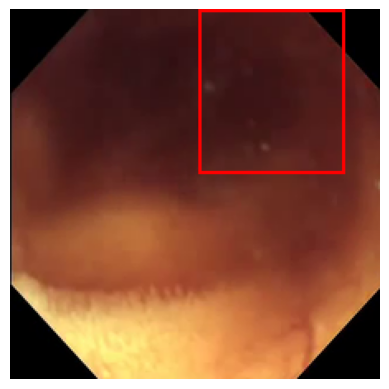

In [ ]:
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Load the XML file
xml_file_path = "/content/MISAHUB/WCEBleedGen/bleeding/Bounding boxes/XML/img- (1176).xml"
tree = ET.parse(xml_file_path)
root = tree.getroot()

# Extract image path, width, and height
# image_path = root.find('path').text
image_path = '/content/MISAHUB/train/images/image_1176.png'
image_width = int(root.find('size/width').text)
image_height = int(root.find('size/height').text)

# Load the image
image = Image.open(image_path)

# Create a drawing context to draw on the image
draw = ImageDraw.Draw(image)

# Loop through object elements in the XML
for obj in root.findall('object'):
    # Extract bounding box coordinates
    xmin = int(obj.find('bndbox/xmin').text)
    ymin = int(obj.find('bndbox/ymin').text)
    xmax = int(obj.find('bndbox/xmax').text)
    ymax = int(obj.find('bndbox/ymax').text)
    print(xmin, xmax, ymin, ymax)
    # Draw the bounding box on the image
    draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=2)  # You can customize the color and width

# Save or display the image with bounding boxes
 # This will display the image with bounding boxes
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()
# If you want to save the image with bounding boxes:
# image_with_boxes_path = 'path_to_save_image_with_boxes.png'
# image.save(image_with_boxes_path)


In [ ]:
import os
import xml.etree.ElementTree as ET

# Directory containing XML files
xml_folder = "/content/MISAHUB/WCEBleedGen/bleeding/Bounding boxes/XML"

# Directory to save TXT files
txt_folder = "/content/MISAHUB/WCEBleedGen/bleeding/Bounding boxes/TXT"

# Create the TXT folder if it doesn't exist
os.makedirs(txt_folder, exist_ok=True)

# Iterate through XML files in the folder
for xml_filename in os.listdir(xml_folder):
    if xml_filename.endswith(".xml"):
        # Construct the full paths for XML and TXT files
        xml_path = os.path.join(xml_folder, xml_filename)
        txt_filename = os.path.splitext(xml_filename)[0] + ".txt"
        txt_path = os.path.join(txt_folder, txt_filename)

        # Parse the XML file
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Open the TXT file for writing
        with open(txt_path, "w") as txt_file:
            # Loop through object elements in the XML
            for obj in root.findall('object'):
                # Extract bounding box coordinates
                xmin = int(obj.find('bndbox/xmin').text)
                ymin = int(obj.find('bndbox/ymin').text)
                xmax = int(obj.find('bndbox/xmax').text)
                ymax = int(obj.find('bndbox/ymax').text)

                # Write the coordinates to the TXT file
                txt_file.write(f"{xmin} {ymin} {xmax} {ymax}\n")

        print(f"Converted {xml_filename} to {txt_filename}")

print("Conversion complete.")


# **Detecting Bleeding edges from correctly classified images Using MaskedRCNN**

# **Load Dataset**

In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

In [ ]:
images = sorted(os.listdir("/content/MISAHUB/WCEBleedGen/bleeding/Images"))
masks = sorted(os.listdir("/content/MISAHUB/WCEBleedGen/bleeding/Annotations"))

In [ ]:
img = Image.open("/content/MISAHUB/WCEBleedGen/bleeding/Images/" + images[0]).convert("RGB")
mask = Image.open("/content/MISAHUB/WCEBleedGen/bleeding/Annotations/" + masks[0])

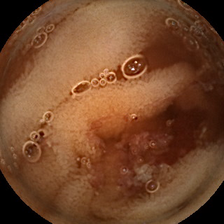

In [ ]:
img

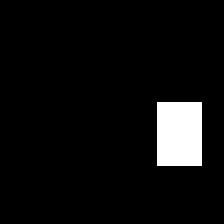

In [ ]:
mask

In [ ]:
np.unique(mask)

array([False,  True])

In [ ]:
class CustDat(torch.utils.data.Dataset):
    def __init__(self , images , masks):
        self.imgs = images
        self.masks = masks

    def __getitem__(self , idx):
        img = Image.open("/content/MISAHUB/WCEBleedGen/bleeding/Images/" + self.imgs[idx]).convert("RGB")
        mask = Image.open("/content/MISAHUB/WCEBleedGen/bleeding/Annotations/" + self.masks[idx])
        mask = np.array(mask)
        obj_ids = np.unique(mask)
        obj_ids = obj_ids[1:]
        num_objs = len(obj_ids)
        masks = np.zeros((num_objs , mask.shape[0] , mask.shape[1]))
        for i in range(num_objs):
            masks[i][mask == i+1] = True
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin , ymin , xmax , ymax])
        boxes = torch.as_tensor(boxes , dtype = torch.float32)
        labels = torch.ones((num_objs,) , dtype = torch.int64)
        masks = torch.as_tensor(masks , dtype = torch.uint8)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        return T.ToTensor()(img) , target

    def __len__(self):
        return len(self.imgs)

In [ ]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn()
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features , 2)
in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer = 256
model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask , hidden_layer , 2)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 51.1MB/s]


In [ ]:
transform = T.ToTensor()

In [ ]:
def custom_collate(data):
  return data

# Splitting

In [ ]:
images = sorted(os.listdir("/content/MISAHUB/WCEBleedGen/bleeding/Images"))
masks = sorted(os.listdir("/content/MISAHUB/WCEBleedGen/bleeding/Annotations"))
num = int(0.9 * len(images))
num = num if num % 2 == 0 else num + 1
train_imgs_inds = np.random.choice(range(len(images)) , num , replace = False)
val_imgs_inds = np.setdiff1d(range(len(images)) , train_imgs_inds)
train_imgs = np.array(images)[train_imgs_inds]
val_imgs = np.array(images)[val_imgs_inds]
train_masks = np.array(masks)[train_imgs_inds]
val_masks = np.array(masks)[val_imgs_inds]


In [ ]:
train_dl = torch.utils.data.DataLoader(CustDat(train_imgs , train_masks) ,
                                 batch_size = 2 ,
                                 shuffle = True ,
                                 collate_fn = custom_collate ,
                                 num_workers = 1 ,
                                 pin_memory = True if torch.cuda.is_available() else False)
val_dl = torch.utils.data.DataLoader(CustDat(val_imgs , val_masks) ,
                                 batch_size = 2 ,
                                 shuffle = True ,
                                 collate_fn = custom_collate ,
                                 num_workers = 1 ,
                                 pin_memory = True if torch.cuda.is_available() else False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model.to(device)

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu):

In [ ]:
params = [p for p in model.parameters() if p.requires_grad]

In [ ]:
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Training

In [ ]:
all_train_losses = []
all_val_losses = []
flag = False
for epoch in range(10):
    train_epoch_loss = 0
    val_epoch_loss = 0
    model.train()
    for i , dt in enumerate(train_dl):
        imgs = [dt[0][0].to(device) , dt[1][0].to(device)]
        targ = [dt[0][1] , dt[1][1]]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targ]
        loss = model(imgs , targets)
        if not flag:
            print(loss)
            flag = True
        losses = sum([l for l in loss.values()])
        train_epoch_loss += losses.cpu().detach().numpy()
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
    all_train_losses.append(train_epoch_loss)
    with torch.no_grad():
        for j , dt in enumerate(val_dl):
            imgs = [dt[0][0].to(device) , dt[1][0].to(device)]
            targ = [dt[0][1] , dt[1][1]]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targ]
            loss = model(imgs , targets)
            losses = sum([l for l in loss.values()])
            val_epoch_loss += losses.cpu().detach().numpy()
        all_val_losses.append(val_epoch_loss)
    print(epoch , "  " , train_epoch_loss , "  " , val_epoch_loss)

{'loss_classifier': tensor(0.6094, device='cuda:0', grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.0303, device='cuda:0', grad_fn=<DivBackward0>), 'loss_mask': tensor(2.0514, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_objectness': tensor(0.6962, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.0181, device='cuda:0', grad_fn=<DivBackward0>)}


ValueError: ignored

# Evaluation

In [ ]:
plt.plot(all_train_losses)

In [ ]:
plt.plot(all_val_losses)